# Health Insurance Prediction

###### What would be the cost of medical insurane of a person perdict by using given features 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:


#from sklearn.liner_model import LinearRegression
#from sklearn import matrics

In [3]:
insurance_dataset = pd.read_csv("insurance.csv") 

In [4]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
1. sex
2. smoker
3. region

In [8]:
insurance_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### No null values 

#### Data Analysis

In [10]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

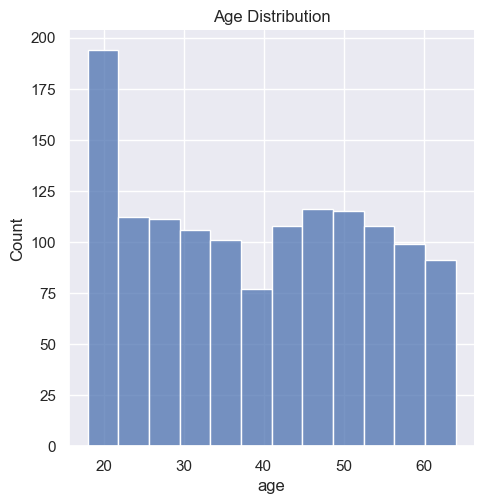

In [11]:
# destribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

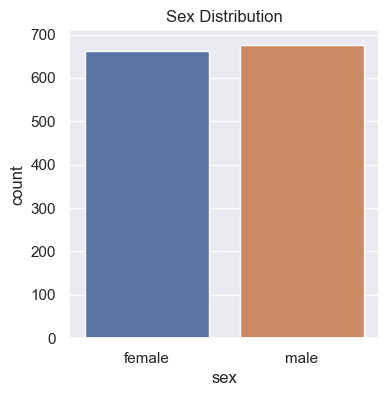

In [12]:
# gender
plt.figure(figsize=(4,4))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [13]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

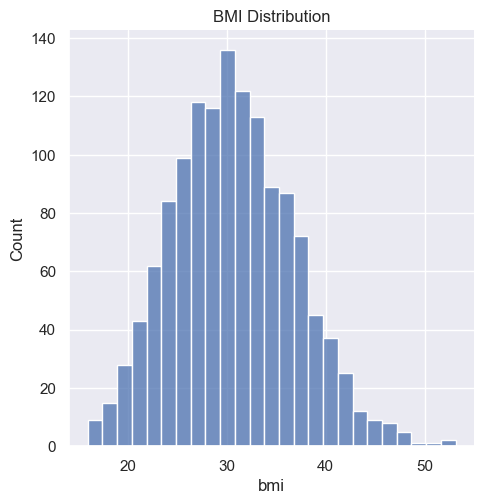

In [14]:
# destribution of bmi values
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range = 18.5 to 24.9
As observed in figure we can state that BMI range in between 25 to 40 so more people are over weight price of insurence of these people will maybe high.


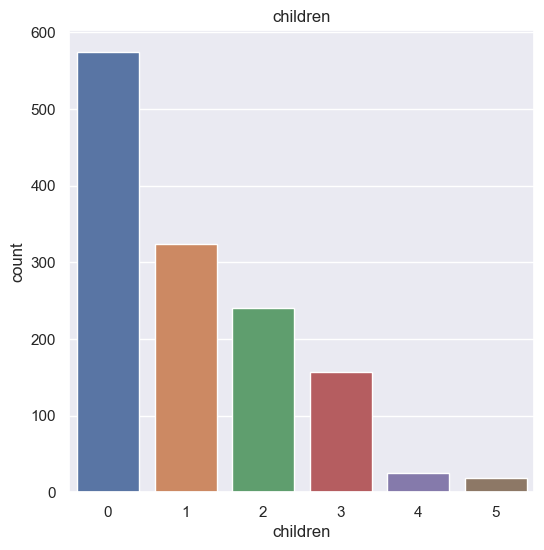

In [15]:
#Children 
plt.figure(figsize=(6,6))
sns.countplot(x= 'children', data = insurance_dataset)
plt.title('children')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

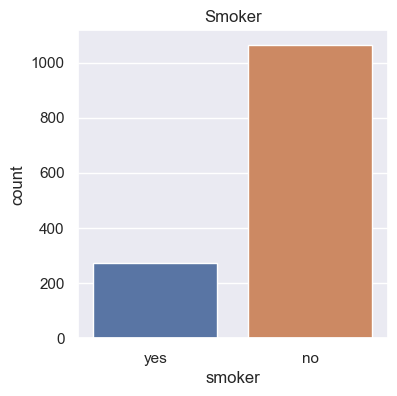

In [17]:
# age smoker
plt.figure(figsize=(4,4))
sns.countplot(x= 'smoker', data = insurance_dataset)
plt.title('Smoker')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

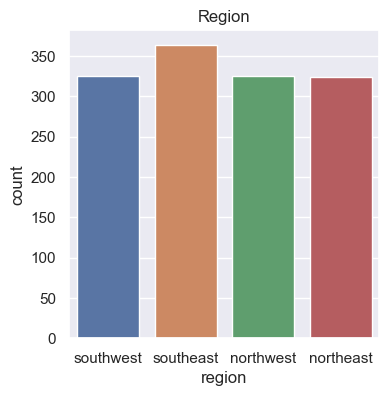

In [19]:
# destribution of age region
plt.figure(figsize=(4,4))
sns.countplot(x= 'region', data = insurance_dataset)
plt.title('Region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

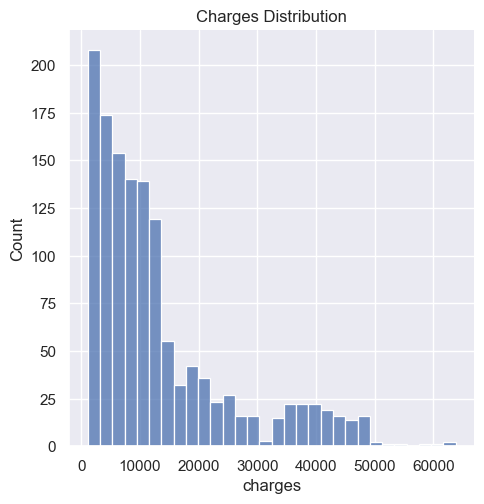

In [21]:
# destribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Pre-processing

In [22]:
# encoding sex column 
insurance_dataset.replace({'sex':{"male":0, "female":1}},inplace = True)

In [23]:
# encoding smoker column 
insurance_dataset.replace({'smoker':{"yes":0, "no":1}},inplace = True)

In [24]:
# encoding region column 
insurance_dataset.replace({'region':{"southeast":0, "southwest":1,"northeast":2,"northwest":3}},inplace = True)

In [25]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


##### splitting the feature and target

In [26]:
X = insurance_dataset.drop(columns="charges", axis = 1)
y = insurance_dataset['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


###### Splitting data into Trainning data and Testing data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()

In [33]:
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [34]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [38]:
import sklearn.metrics as metrics

In [39]:
# R square values 
r2_train = metrics.r2_score(y_train, training_data_prediction)
print("R squared value:", r2_train)

R squared value: 0.751505643411174


In [46]:
# prediction on test data
training_data_prediction = regressor.predict(X_test)

In [47]:
# R square values 
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R squared value:", r2_test)

R squared value: 0.7447273869684077
